<a href="https://colab.research.google.com/github/aliimronf2/pacd-2nd-assignment/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ali Imron Filayaty Faqih (25/562591/PPA/07068)

# Convolution Function

In [34]:
import numpy as np

img_mtx = np.array([
    [1, 2, 1, 2],
    [0, 1, 2, 1],
    [3, 2, 1, 2],
    [1, 1, 2, 1]
])

filt = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# padding otomatis sesuai ukuran kernel
pad = filt.shape[0] // 2
rows, cols = img_mtx.shape

img_padded = np.zeros((rows + 2*pad, cols + 2*pad))
img_padded[pad:pad+rows, pad:pad+cols] = img_mtx

filtered = np.zeros((rows, cols))

# konvolusi manual
for i in range(rows):
    for j in range(cols):
        window = img_padded[i:i+filt.shape[0], j:j+filt.shape[1]]
        filtered[i, j] = np.sum(window * filt)

print("Hasil filter:")
print(filtered)

Hasil filter:
[[3. 5. 7. 4.]
 [5. 7. 6. 7.]
 [6. 8. 9. 5.]
 [5. 6. 5. 5.]]


Selanjutnya, kode di atas dimodifikasi agar dapat dipanggil sebagai fungsi `convolution2d`.

In [35]:
import numpy as np

def convolution2d(img, kernel):
  '''
  Fungsi ini melakukan konvolusi pada citra grayscale.
  Input: img (array 2d citra grayscale) dan kernel (array 2d)
  Output: array 2d hasil konvolusi
  '''

  # ukuran kernel
  k_rows, k_cols = kernel.shape
  pad = k_rows // 2

  # padding citra
  rows, cols = img.shape
  img_padded = np.zeros((rows + 2*pad, cols + 2*pad))
  img_padded[pad:pad+rows, pad:pad+cols] = img

  # output kosong
  filtered = np.zeros((rows, cols))

  # konvolusi manual
  for i in range(rows):
    for j in range(cols):
      window = img_padded[i:i+k_rows, j:j+k_cols]
      filtered[i, j] = np.sum(window * kernel)

  return filtered

In [36]:
# test pada matriks citra
img_mtx = np.array([
    [1, 2, 1, 2],
    [0, 1, 2, 1],
    [3, 2, 1, 2],
    [1, 1, 2, 1]
])

filt = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

result = convolution2d(img_mtx, filt)
print("Hasil filter:")
print(result)

Hasil filter:
[[3. 5. 7. 4.]
 [5. 7. 6. 7.]
 [6. 8. 9. 5.]
 [5. 6. 5. 5.]]


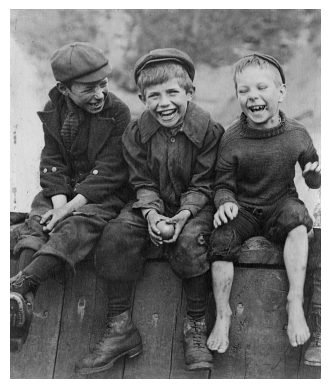

In [37]:
# test pada citra digital asli
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# url citra
url = "https://drive.google.com/uc?export=download&id=1-AaoKA1oMz0w9Ix_CNzfe9Y3FLAHD-Xg"

# ambil data gambar dari url
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")

# tampilkan citra
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

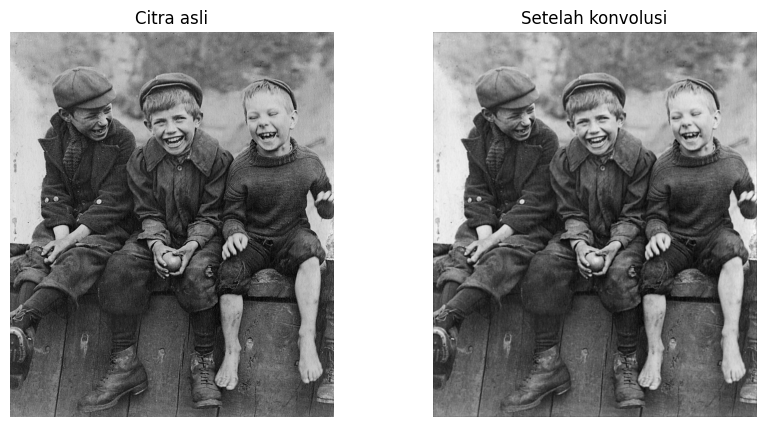

In [38]:
# kernel
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# proses konvolusi
img_array = np.array(img)
filtered = convolution2d(img_array, kernel)

# tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_array, cmap="gray")
plt.title("Citra asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(filtered, cmap="gray")
plt.title("Setelah konvolusi")
plt.axis("off")

plt.show()


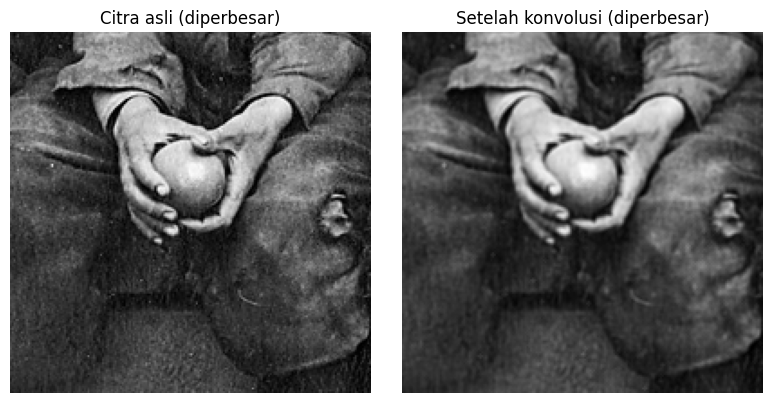

In [39]:
h, w = img_array.shape
crop_size = 200
x, y = w//2, h//2 + 100
x1, x2 = x - crop_size//2, x + crop_size//2
y1, y2 = y - crop_size//2, y + crop_size//2

crop_original = img_array[y1:y2, x1:x2]
crop_filtered = filtered[y1:y2, x1:x2]

# --- Tampilkan hasil zoom in ---
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(crop_original, cmap="gray")
axes[0].set_title("Citra asli (diperbesar)")
axes[0].axis("off")

axes[1].imshow(crop_filtered, cmap="gray")
axes[1].set_title("Setelah konvolusi (diperbesar)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Spatial Domain Filtering with Several Kernels

Untuk mengurangi _noise_ pada citra, kita dapat menggunakan mean filter, Gaussian filter, dan median filter.

## Smoothing (Low-pass) Filters

### Mean Filter

Mean filter bekerja dengan cara mengganti _pixel-pixel_ di dalam citra dengan rata-rata intensitas dari _neighborhood_ $m\times n$ yang berpusat pada _pixel_ yang bersangkutan.

Misalkan kernel berukuran $3\times 3$, maka mean filter yang dipakai adalah
$$
\frac{1}{9} \sum_{i=-a}^{a} \sum_{j=-b}^{j=b} f(x+i, y+j)
$$

Pada kelas PACD, digunakan filter berikut:
$$\frac{1}{9} \begin{array}{|c|c|c|}
\hline
1 & 1 & 1 \\
\hline
1 & 1 & 1 \\
\hline
1 & 1 & 1 \\
\hline
\end{array} \approx \begin{array}{|c|c|c|}
\hline
0.11 & 0.11 & 0.11 \\
\hline
0.11 & 0.11 & 0.11 \\
\hline
0.11 & 0.11 & 0.11 \\
\hline
\end{array}$$

Mean filter digunakan dalam _image smoothing_.

In [40]:
# kode mean filter
import numpy as np
from PIL import Image
from io import BytesIO
import requests

def mean_filter(img, kernel_size=3):
  '''
  Melakukan mean filtering pada citra (numpy array).

  Parameter:
  - img: citra grayscale
  - kernel_size: ukuran kernel atau filter

  Output:
  - filtered: hasil filtering
  '''

  # Buat kernel mean filter berukuran kernel_size x kernel_size
  mean_kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

  # Padding
  pad = kernel_size // 2
  rows, cols = img.shape
  img_padded = np.zeros((rows + 2*pad, cols + 2*pad))
  img_padded[pad:pad+rows, pad:pad+cols] = img

  filtered = np.zeros((rows, cols))

  # Mean filtering (konvolusi dengan kernel rata-rata)
  for i in range(rows):
      for j in range(cols):
          window = img_padded[i:i+kernel_size, j:j+kernel_size]
          filtered[i, j] = np.round(np.sum(window * mean_kernel))

  return filtered


Contoh penggunaan:

In [41]:
# Contoh penggunaan mean filtering
img_mtx = np.array([
    [9, 2, 2, 1],
    [2, 2, 9, 2],
    [10, 2, 2, 2],
    [2, 2, 1, 2]
])

mean_filtered = mean_filter(img_mtx, kernel_size=3)
print("Hasil mean filtering:")
print(np.round(mean_filtered))

Hasil mean filtering:
[[2. 3. 2. 2.]
 [3. 4. 3. 2.]
 [2. 4. 3. 2.]
 [2. 2. 1. 1.]]


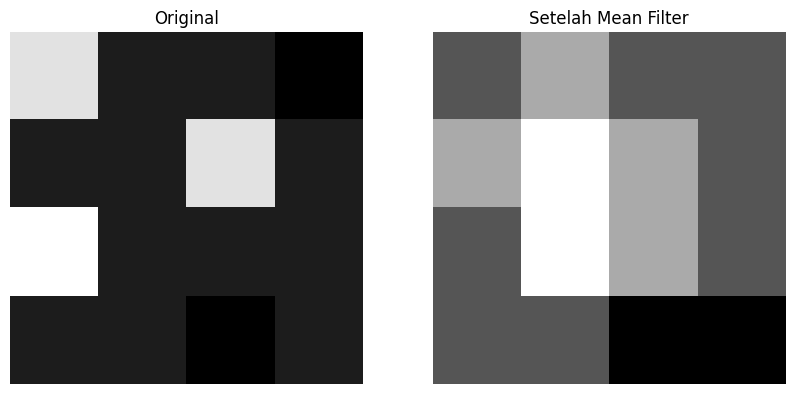

In [42]:
# Perbandingan secara visual
import matplotlib.pyplot as plt

norm = (img_mtx - img_mtx.min()) / (img_mtx.max() - img_mtx.min())
img_mtx_norm = (norm * 255).astype(np.uint8)
norm = (mean_filtered - mean_filtered.min()) / (mean_filtered.max() - mean_filtered.min())
filtered_norm = (norm * 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_mtx_norm, cmap="gray",  vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(filtered_norm, cmap="gray",  vmin=0, vmax=255)
plt.title("Setelah Mean Filter")
plt.axis("off")

plt.show()

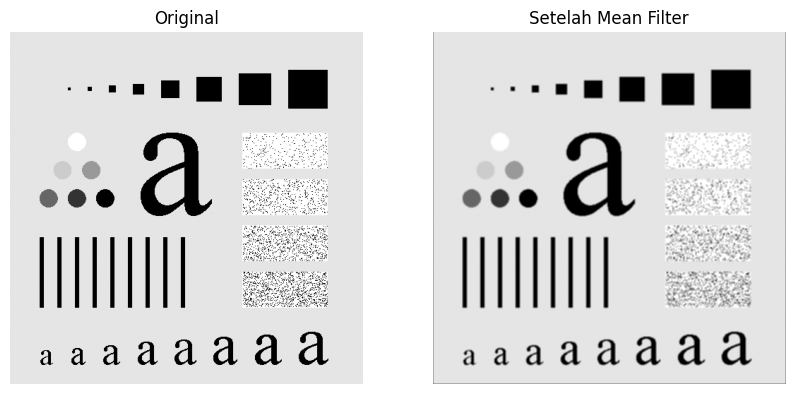

In [43]:
# Penggunaan pada citra asli
url = "https://drive.google.com/uc?export=download&id=1NyqLAT72qM0zQUnj8eRgsEcbxefPpfQJ"
response = requests.get(url)
img_for_mean = Image.open(BytesIO(response.content)).convert("L")
img_for_mean_array = np.array(img_for_mean)

mean_filtered_img = mean_filter(img_for_mean_array, kernel_size=3)

# Tampilkan hasil
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_for_mean_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mean_filtered_img, cmap="gray")
plt.title("Setelah Mean Filter")
plt.axis("off")

plt.show()

Dari hasil tersebut, diperoleh kelebihan dan kelemahan dari mean filter sebagai berikut:
- Kelebihan: mean filter bisa mereduksi noise acak dengan cara meratakan intensitas, cocok untuk noise ringan.
- Kelemahan: mean filter mengaburkan detail halus, seperti pada contoh citra output di atas, huruf "a" menjadi sedikit buram. Dari citra output tersebut, mean filter juga tidak effektif untuk noise dengan titik hitam-putih yang ekstrim.

### Gaussian Filter

Gaussian filter menggunakan fungsi kontinu untuk mendapatkan filter spasial. Bentuk dasar dari fungsi Gaussian adalah
$$
h(x,y) = e^{-\frac{x^2+y^2}{2\sigma^2}}
$$
dengan $\sigma$ adalah standar deviasi dan $x,y$ merupakan koordinat atau lokasi dari pixel.

Misal dibuat filter $3\times 3$, sebagai berikut:
$$
\begin{array}{|c|c|c|}
\hline
w_1 & w_2 & w_3 \\
\hline
w_4 & w_5 & w_6 \\
\hline
w_7 & w_8 & w_9 \\
\hline
\end{array}
$$

maka $w_1 = h(-1, -1), w_2=h(-1,0), \ldots, w_9 = h(1,1)$.


In [44]:
# kode mean filter
import numpy as np
from PIL import Image
from io import BytesIO
import requests

# fungsi untuk membuat filter / kernel gaussian
def gaussian_kernel(size=3, sigma=1, normalize=False):
    """Membuat kernel Gaussian 2D"""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma * sigma))
    if normalize:
        kernel = kernel / np.sum(kernel)
    return kernel

def gaussian_filter(img, kernel_size=3, sigma=1):
  '''
  Melakukan gaussian filtering pada citra (numpy array).

  Parameter:
  - img: citra grayscale
  - kernel_size: ukuran kernel atau filter
  - sigma: nilai standar deviasi untuk digunakan dalam fungsi Gaussian

  Output:
  - filtered: hasil filtering
  '''

  # Buat kernel gaussian filter berukuran kernel_size * kernel_size
  gauss_kernel = gaussian_kernel(kernel_size, sigma, False)

  # Padding
  pad = kernel_size // 2
  rows, cols = img.shape
  img_padded = np.zeros((rows + 2*pad, cols + 2*pad))
  img_padded[pad:pad+rows, pad:pad+cols] = img

  filtered = np.zeros((rows, cols))

  # Mean filtering (konvolusi dengan kernel gaussian)
  for i in range(rows):
      for j in range(cols):
          window = img_padded[i:i+kernel_size, j:j+kernel_size]
          filtered[i, j] = np.round(np.sum(window * gauss_kernel))

  return filtered


Contoh penggunaan:

In [45]:
# Contoh penggunaan Gaussian filtering
img_mtx = np.array([
    [9, 2, 2, 1],
    [2, 2, 9, 2],
    [10, 2, 2, 2],
    [2, 2, 1, 2]
])

gaussian_filtered = gaussian_filter(img_mtx, kernel_size=3, sigma=1)
print("Hasil Gaussian filtering:")
print(np.round(gaussian_filtered))

Hasil Gaussian filtering:
[[12. 14. 11.  7.]
 [16. 20. 16. 11.]
 [15. 17. 13.  9.]
 [10.  9.  6.  5.]]


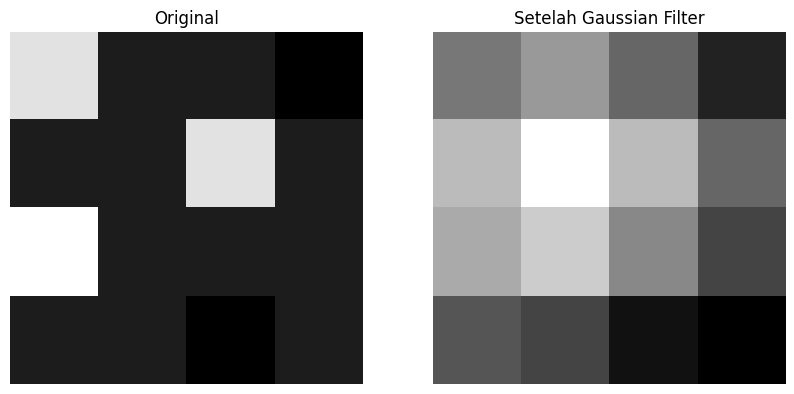

In [46]:
# Perbandingan secara visual
import matplotlib.pyplot as plt

norm = (img_mtx - img_mtx.min()) / (img_mtx.max() - img_mtx.min())
img_mtx_norm = (norm * 255).astype(np.uint8)
norm = (gaussian_filtered - gaussian_filtered.min()) / (gaussian_filtered.max() - gaussian_filtered.min())
filtered_norm = (norm * 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_mtx_norm, cmap="gray",  vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(filtered_norm, cmap="gray",  vmin=0, vmax=255)
plt.title("Setelah Gaussian Filter")
plt.axis("off")

plt.show()

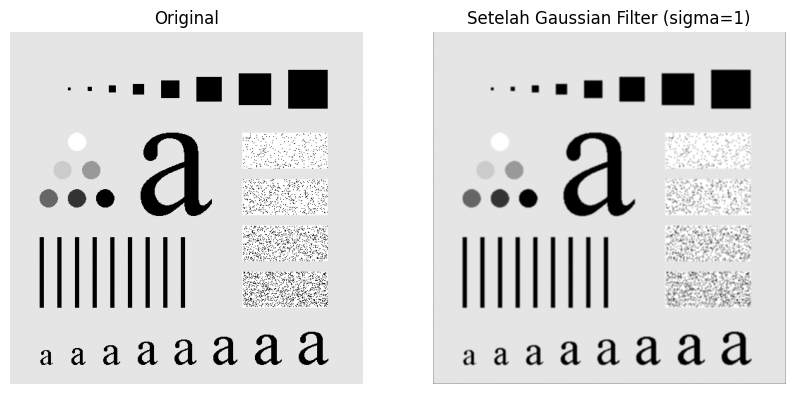

In [47]:
# Penggunaan pada citra asli
url = "https://drive.google.com/uc?export=download&id=1NyqLAT72qM0zQUnj8eRgsEcbxefPpfQJ"
response = requests.get(url)
img_for_gaussian = Image.open(BytesIO(response.content)).convert("L")
img_for_gaussian_array = np.array(img_for_gaussian)

gaussian_filtered_img = gaussian_filter(img_for_gaussian_array, kernel_size=3, sigma=1)

# Tampilkan hasil
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_for_gaussian_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gaussian_filtered_img, cmap="gray")
plt.title("Setelah Gaussian Filter (sigma=1)")
plt.axis("off")

plt.show()

Selanjutnya akan dicoba beberapa nilai $\sigma$, yaitu $0.5$, $1$, $2$, $4$, $8$, dan $16$.

Pada buku Digital Image Processing oleh Gonzalez dan Woods edisi ketiga, disebutkan bahwa
> _In practice, it is difficult in general to see differences between images smoothed by using either of the masks in Fig. 3.32,_ (maksudnya mean filter 3x3 atau Gaussian filter 3x3) _or similar arrangements, because the area spanned with these masks at any one location in image is so small_.

Untuk $\sigma$ yang cukup besar ($> 1$), distribusi Gaussian semakin lebar, yaitu nilai tidak hanya signifikan di dekat pusat, tapi juga jauh. Akibatnya, kernel $3\times 3$ tidak merepresentasikan Gaussian dengan baik, sehingga hasil _smoothing_ lebih mirip mean filter.

Pada buku Digital Image Processing oleh Gonzalez dan Woods edisi keempat, disebutkan bahwa
> _Separability is one of many fundamental properties of circularly symmetric Gaussian kernels. For example, we know that the values of a Gaussian function at a distance larger that $3\sigma$ from the mean are small enough that they can be ignored. This means that if we select the size of a Gaussian kernel to be $\lceil 6\sigma\rceil \times \lceil 6\sigma \rceil$, we are assured of getting essentially the same result if we had used an arbitrarily large Gaussian kernel. Viewed another way, this property tells us that there
is nothing to be gained by using a Gaussian kernel larger than $\lceil 6\sigma\rceil \times \lceil 6\sigma \rceil$ for image processing. Because typically we work with kernels of odd dimensions, we would use the smallest **odd** integer that satisfies this condition (e.g., a $43\times 43$ kernel if $\sigma=7$)._

Dengan alasan ini, dipakai ukuran kernel = $6\sigma + 1$ untuk sigma sedang hingga besar $(\sigma>1)$.

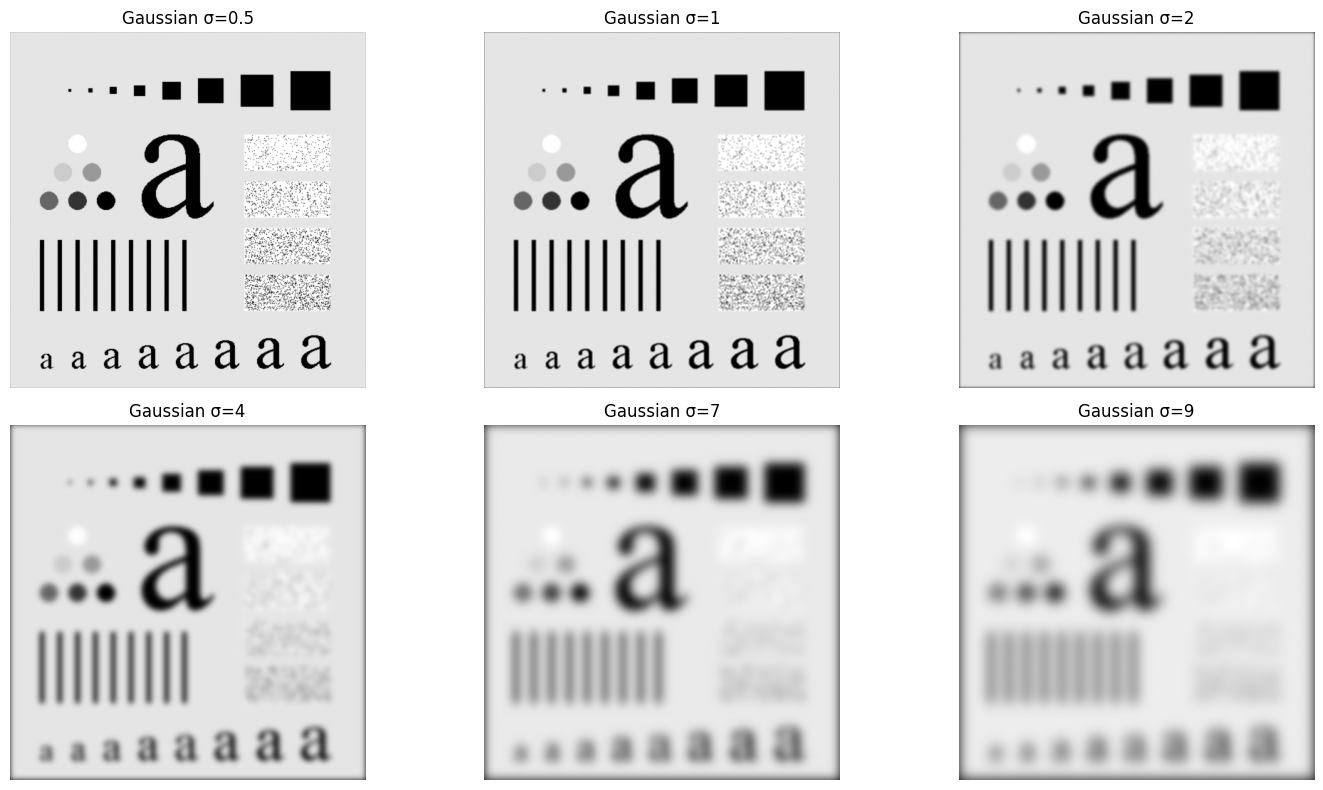

In [48]:
# Perbandingan hasil untuk beberapa sigma
url = "https://drive.google.com/uc?export=download&id=1NyqLAT72qM0zQUnj8eRgsEcbxefPpfQJ"
response = requests.get(url)
img_for_gaussian_for_different_sigmas = Image.open(BytesIO(response.content)).convert("L")
img_for_gaussian_for_different_sigmas_array = np.array(img_for_gaussian_for_different_sigmas)

# Sigma yang ingin dicoba
sigmas = [0.5, 1, 2, 4, 7, 9]

plt.figure(figsize=(15, 8))

for idx, sigma in enumerate(sigmas, 1):
    if sigma <= 1:
      size = 3
    else:
      size = int(6*sigma + 1)
    filtered = gaussian_filter(img=img_for_gaussian_for_different_sigmas_array, kernel_size=size, sigma=sigma)

    plt.subplot(2, 3, idx)
    plt.imshow(filtered, cmap="gray")
    plt.title(f"Gaussian σ={sigma}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Dari hasil tersebut, tampak bahwa semakin besar nilai $\sigma$, semakin _smooth_ citra yang dihasilkan.

### Median Filter

Median filter mengganti nilai suatu pixel dengan median dari level-level intensitas di dalam _neighborhood_ dari pixel tersebut:
$$\hat{f}(x,y) = \underset{(s,t)\in S_{xy}}{\text{median}} \{ g(s,t) \}$$

Nilai pixel pada $(x,y)$ dimasukkan dalam penghitungan median.

Namun ketika menggunakan _padding_, _padding_ tidak disertakan dalam penghitungan median.

In [49]:
# kode median filter
import numpy as np
from PIL import Image
from io import BytesIO
import requests

def median_filter(img, kernel_size=3):
  '''
  Melakukan gaussian filtering pada citra (numpy array).

  Parameter:
  - img: citra grayscale
  - kernel_size: ukuran kernel atau filter

  Output:
  - filtered: hasil filtering
  '''

  # Padding
  pad = kernel_size // 2
  rows, cols = img.shape

  filtered = np.zeros((rows, cols))

  # Median filtering tanpa ikut padding nol
  for i in range(rows):
      for j in range(cols):
          # Tentukan batas window yang valid (tidak keluar matriks asli)
          r_start = max(0, i - pad)
          r_end   = min(rows, i + pad + 1)
          c_start = max(0, j - pad)
          c_end   = min(cols, j + pad + 1)

          # Ambil window valid dari gambar asli
          window = img[r_start:r_end, c_start:c_end]

          # Hitung median
          filtered[i, j] = np.median(window)

  return filtered


Contoh penggunaan:

In [50]:
# Contoh penggunaan median filtering
img_mtx = np.array([
    [9, 2, 2, 1],
    [2, 2, 9, 2],
    [10, 2, 2, 2],
    [2, 2, 1, 2]
])

median_filtered = median_filter(img_mtx, kernel_size=3)
print("Hasil median filtering:")
print(np.round(median_filtered))

Hasil median filtering:
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]


/tmp/ipython-input-3648045755.py:6: RuntimeWarning: invalid value encountered in divide
  norm = (median_filtered - median_filtered.min()) / (median_filtered.max() - median_filtered.min())
/tmp/ipython-input-3648045755.py:7: RuntimeWarning: invalid value encountered in cast
  filtered_norm = (norm * 255).astype(np.uint8)


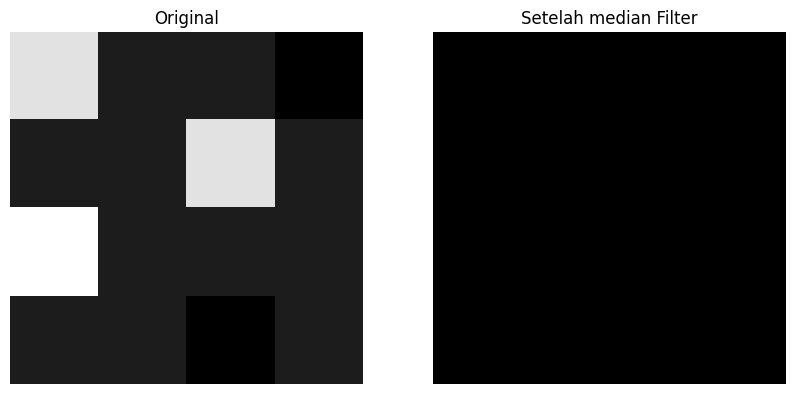

In [51]:
# Perbandingan secara visual
import matplotlib.pyplot as plt

norm = (img_mtx - img_mtx.min()) / (img_mtx.max() - img_mtx.min())
img_mtx_norm = (norm * 255).astype(np.uint8)
norm = (median_filtered - median_filtered.min()) / (median_filtered.max() - median_filtered.min())
filtered_norm = (norm * 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_mtx_norm, cmap="gray",  vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(filtered_norm, cmap="gray",  vmin=0, vmax=255)
plt.title("Setelah median Filter")
plt.axis("off")

plt.show()

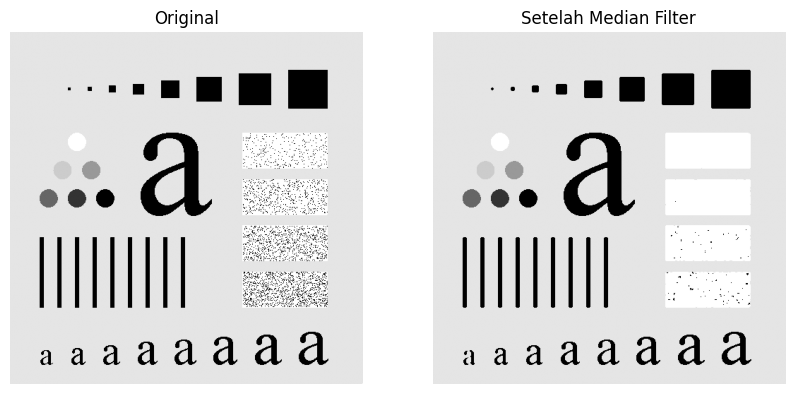

In [52]:
# Penggunaan pada citra asli
url = "https://drive.google.com/uc?export=download&id=1NyqLAT72qM0zQUnj8eRgsEcbxefPpfQJ"
response = requests.get(url)
img_for_median = Image.open(BytesIO(response.content)).convert("L")
img_for_median_array = np.array(img_for_median)

median_filtered_img = median_filter(img_for_median_array, kernel_size=3)

# Tampilkan hasil
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_for_median_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(median_filtered_img, cmap="gray")
plt.title("Setelah Median Filter")
plt.axis("off")

plt.show()

Median filter melakukan _noise reduction_ yang sangat bagus terhadap _impulse noise_ (atau biasa disebut _salt and pepper_).

Tampak pada citra hasil median filter di atas, _noise_ pada empat box di gambar sebelah kiri direduksi dengan sangat baik dan hasilnya bisa dilihat pada gambar sebelah kanan.

## Discussion

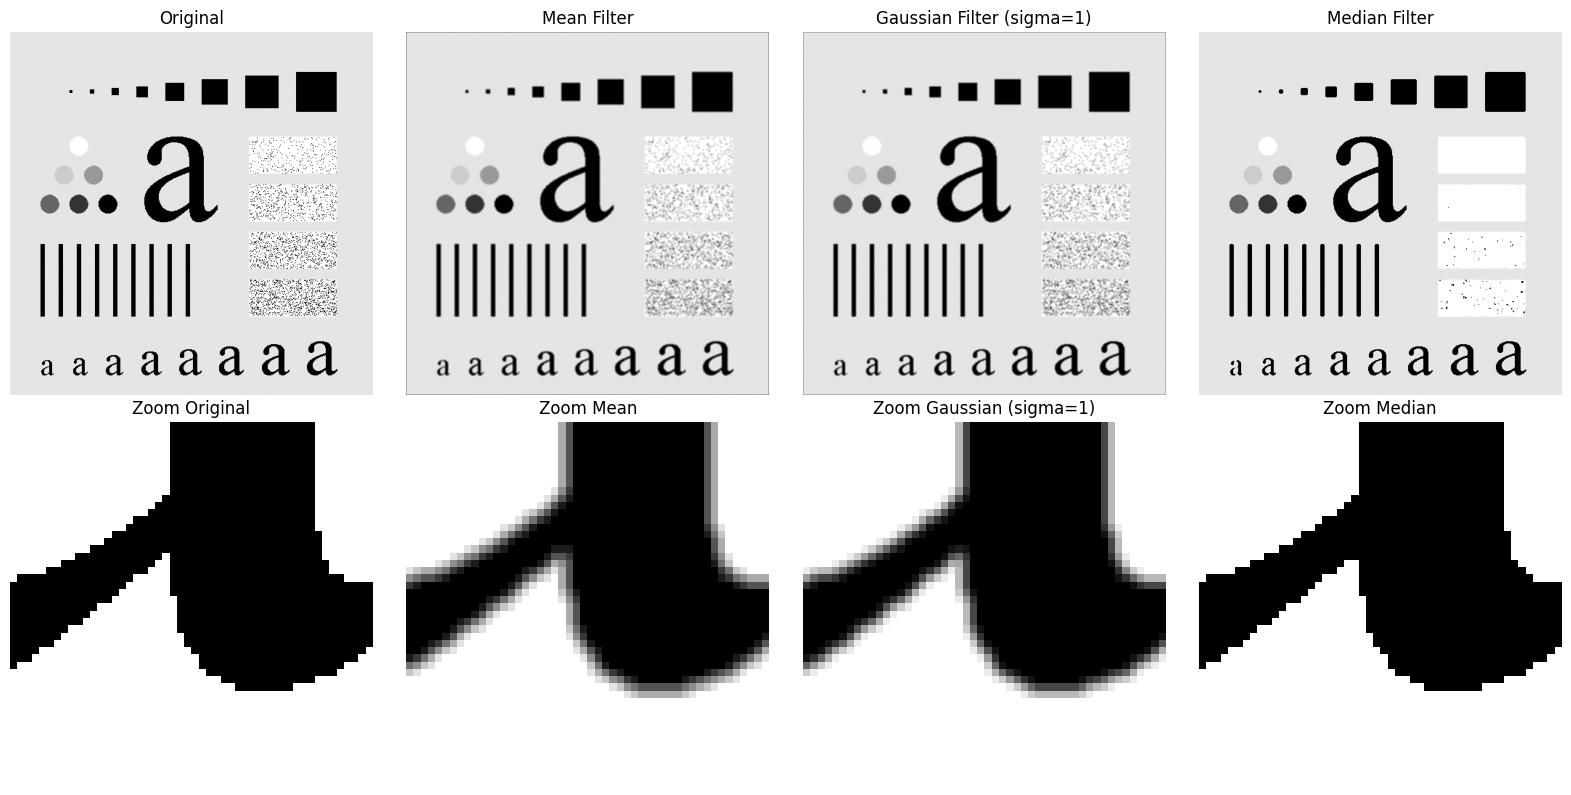

In [53]:
# Perbandingan mean filter, Gaussian filter, dan median filter
url = "https://drive.google.com/uc?export=download&id=1NyqLAT72qM0zQUnj8eRgsEcbxefPpfQJ"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img_array = np.array(img)

mean_result = mean_filter(img_array, kernel_size=3)
gaussian_result = gaussian_filter(img_array, kernel_size=3, sigma=1)
median_result = median_filter(img_array, kernel_size=3)

rows, cols = img_array.shape
zoom_size = 50
r_start = rows//2 - zoom_size//2
c_start = cols//2 - zoom_size//2
r_end = r_start + zoom_size
c_end = c_start + zoom_size

patch_original = img_array[r_start:r_end, c_start:c_end]
patch_mean = mean_result[r_start:r_end, c_start:c_end]
patch_gaussian = gaussian_result[r_start:r_end, c_start:c_end]
patch_median = median_result[r_start:r_end, c_start:c_end]

plt.figure(figsize=(16,8))

# Full image
plt.subplot(2,4,1)
plt.imshow(img_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(2,4,2)
plt.imshow(mean_result, cmap="gray")
plt.title("Mean Filter")
plt.axis("off")

plt.subplot(2,4,3)
plt.imshow(gaussian_result, cmap="gray")
plt.title("Gaussian Filter (sigma=1)")
plt.axis("off")

plt.subplot(2,4,4)
plt.imshow(median_result, cmap="gray")
plt.title("Median Filter")
plt.axis("off")

# Zoomed patch
plt.subplot(2,4,5)
plt.imshow(patch_original, cmap="gray")
plt.title("Zoom Original")
plt.axis("off")

plt.subplot(2,4,6)
plt.imshow(patch_mean, cmap="gray")
plt.title("Zoom Mean")
plt.axis("off")

plt.subplot(2,4,7)
plt.imshow(patch_gaussian, cmap="gray")
plt.title("Zoom Gaussian (sigma=1)")
plt.axis("off")

plt.subplot(2,4,8)
plt.imshow(patch_median, cmap="gray")
plt.title("Zoom Median")
plt.axis("off")

plt.tight_layout()
plt.show()

Dari eksperimen ini, dapat disimpulkan bahwa
- Mean filter cocok digunakan untuk reduksi noise yang tidak terlalu parah, cukup efisien namun hasilnya kasar
- Gaussian filter mereduksi noise namun tetap mempertahankan struktur. Namun semakin besar nilai  σ , semakin blur citra yang dihasilkan
- Median filter merupakan filter terbaik untuk salt-and-peper noise, serta tetap menjaga edges. Median filter bisa digunakan jika noise terlalu parah.

## Sharpening (High-pass) Filters

### Laplacian Filter

Derivatif derajat dua 2D digunakan untuk _image sharpening_. Pada bahasan ini, _isotropic kernel_ adalah kernel yang responnya tidak bergantung arah (_rotationally symmetric_).
Bentuk kernel _isotropic derivative_ yang paling sederhana adalah _Laplacian_, yang mana untuk sebuah fungsi (citra) $f(x,y)$ dari dua variabel, didefinisikan dalam formula
$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

Persamaan tersebut dapat dinyatakan dalam bentuk diskrit. Derivative terhadap variabel $x$ adalah
$$\frac{\partial^2 f}{\partial x^2} = f(x+1, y) + f(x-1, y) -2f(x,y)$$
dan secara sama, derivative terhadap variabel $y$ adalah
$$\frac{\partial^2 f}{\partial y^2} = f(x, y+1) + f(x, y-1) - 2f(x,y)$$

Dari tiga persamaan di atas, diperoleh Laplacian dari dua variabel adalah
$$\nabla^2 f(x,y) = f(x+1, y) + f(x-1, y) + f(x, y+1) + f(x, y-1) - 4f(x,y)$$

Persamaan terakhir tersebut dapat diimplementasikan menggunakan konvolusi dengan kernel-kernel berikut:

$$
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0 \\
\hline
1 & -4 & 1 \\
\hline
0 & 1 & 0 \\
\hline
\end{array}
\begin{array}{|c|c|c|}
\hline
1 & 1 & 1 \\
\hline
1 & -8 & 1 \\
\hline
1 & 1 & 1 \\
\hline
\end{array}
$$

Jika kernel yang digunakan memiliki pusat negatif, maka
$$g(x,y) = f(x,y) - \nabla^2f(x,y)$$

$$
\begin{array}{|c|c|c|}
\hline
0 & -1 & 0 \\
\hline
-1 & 4 & -1 \\
\hline
0 & -1 & 0 \\
\hline
\end{array}
\begin{array}{|c|c|c|}
\hline
-1 & -1 & -1 \\
\hline
-1 & 8 & -1 \\
\hline
-1 & -1 & -1 \\
\hline
\end{array}
$$

Jika kernel yang digunakan memiliki pusat positif, maka
$$g(x,y) = f(x,y) + \nabla^2f(x,y)$$

Contoh penggunaan:

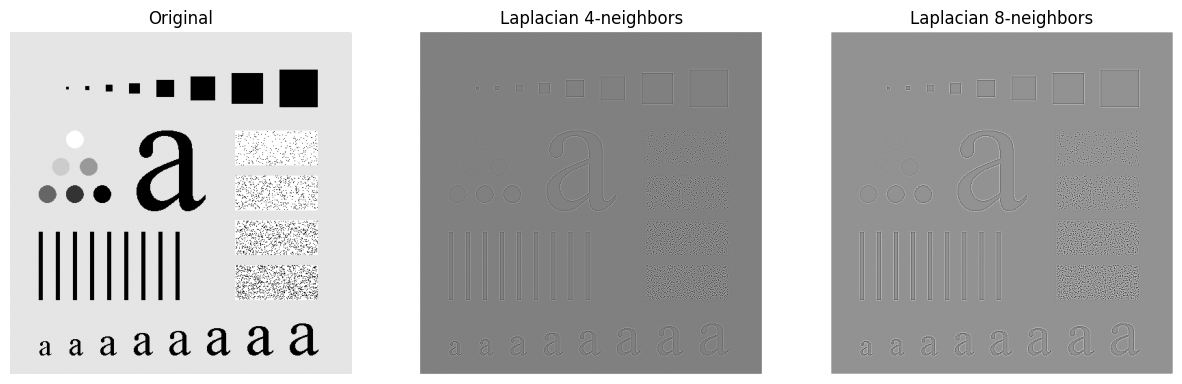

In [54]:
# Contoh penerapan pada citra asli
url = "https://drive.google.com/uc?export=download&id=1NyqLAT72qM0zQUnj8eRgsEcbxefPpfQJ"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img_array = np.array(img)

# Kernel Laplacian 4-neighbors (pusat positif)
laplacian4 = np.array([[0,-1,0],
                       [-1,4,-1],
                       [0,-1,0]])

# Kernel Laplacian 8-neighbors (pusat positif)
laplacian8 = np.array([[-1,-1,-1],
                       [-1, 8,-1],
                       [-1,-1,-1]])

# Filtering
lap4_result = convolution2d(img_array, laplacian4)
lap8_result = convolution2d(img_array, laplacian8)

# Tampilkan hasil
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(lap4_result, cmap="gray")
plt.title("Laplacian 4-neighbors")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(lap8_result, cmap="gray")
plt.title("Laplacian 8-neighbors")
plt.axis("off")

plt.show()

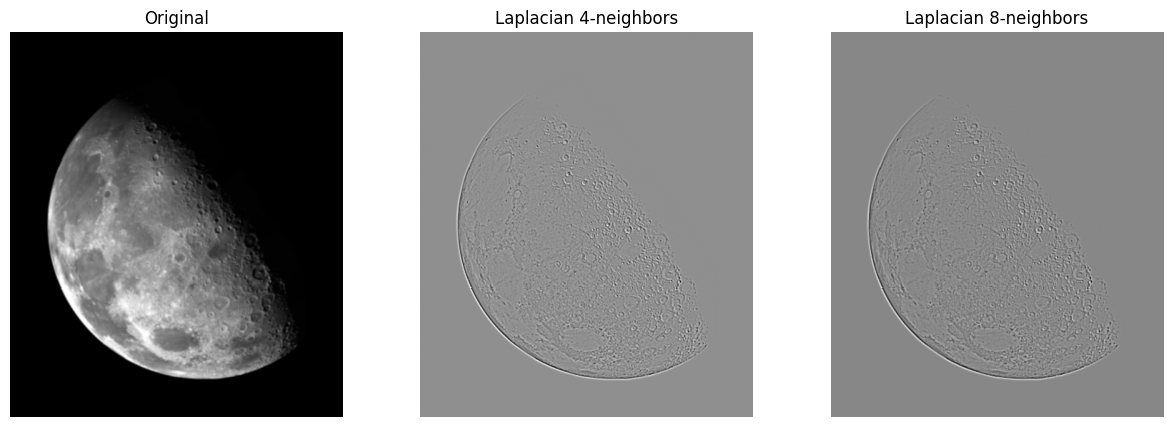

In [55]:
# Contoh penerapan pada citra bulan (seperti pada buku Gonzalez dan Woods)
url = "https://drive.google.com/uc?export=download&id=19RgF4oWeJi-qH-3tY48BWeqJ1oZy3ZQI"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img_array = np.array(img)

# Kernel Laplacian 4-neighbors (pusat negatif)
laplacian4 = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]])

# Kernel Laplacian 8-neighbors (pusat negatif)
laplacian8 = np.array([[1,1,1],
                       [1,-8,1],
                       [1,1,1]])

# Filtering
lap4_result = convolution2d(img_array, laplacian4)
lap8_result = convolution2d(img_array, laplacian8)

# Tampilkan hasil
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(lap4_result, cmap="gray")
plt.title("Laplacian 4-neighbors")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(lap8_result, cmap="gray")
plt.title("Laplacian 8-neighbors")
plt.axis("off")

plt.show()

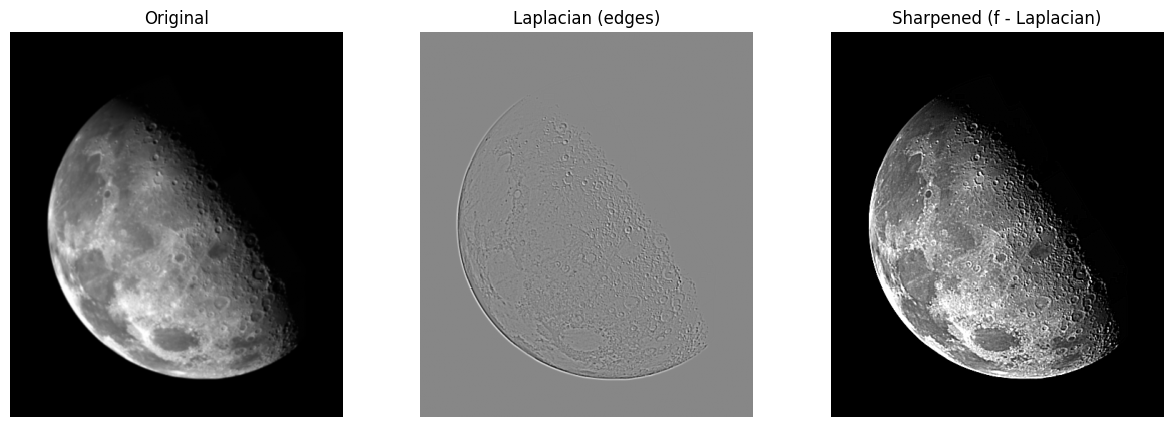

In [56]:
# citra yang sudah dipertajam
# hasil Laplacian (pakai kernel 8 tetangga)
lap8_result = convolution2d(img_array, laplacian8)

# Citra hasil sharpening: g = f + laplacian(f)
sharpened_img = img_array - lap8_result
# jika hasilnya negatif atau di atas 255, perlu dipotong
sharpened_img = np.clip(sharpened_img, 0, 255).astype(np.uint8)

# Tampilkan
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(lap8_result, cmap="gray")
plt.title("Laplacian (edges)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sharpened_img, cmap="gray")
plt.title("Sharpened (f - Laplacian)")
plt.axis("off")

plt.show()


# Sharpening with Blurring Operation

## Laplacian of Gaussian (LoG)

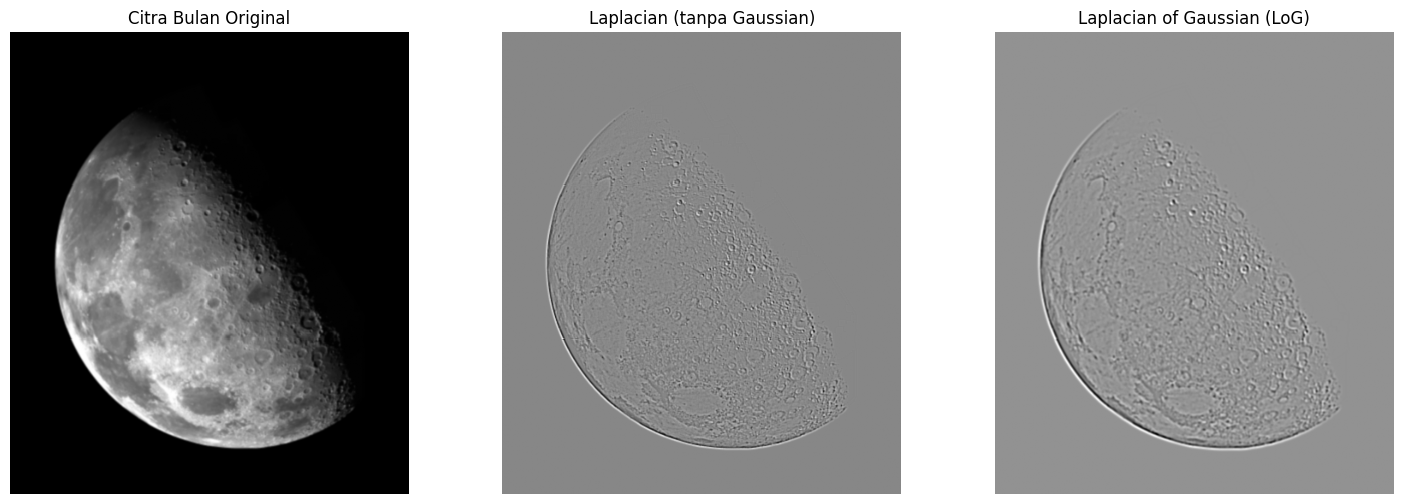

In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

# Load gambar bulan (seperti Gonzalez & Woods)
url = "https://drive.google.com/uc?export=download&id=19RgF4oWeJi-qH-3tY48BWeqJ1oZy3ZQI"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img_array = np.array(img)

# Laplacian Biasa
laplacian8 = np.array([[1,1,1],
                       [1,-8,1],
                       [1,1,1]])

laplacian_result = convolution2d(img_array, laplacian8)


# Laplacian of Gaussian (LoG)
# 1. Gaussian blur terlebih dahulu
gaussian_blurred = gaussian_filter(img_array, kernel_size=5, sigma=1)

# 2. Laplacian
log_result = convolution2d(gaussian_blurred, laplacian8)


# Visualisasi
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(img_array, cmap="gray")
plt.title("Citra Bulan Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(laplacian_result, cmap="gray")
plt.title("Laplacian (tanpa Gaussian)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(log_result, cmap="gray")
plt.title("Laplacian of Gaussian (LoG)")
plt.axis("off")

plt.show()


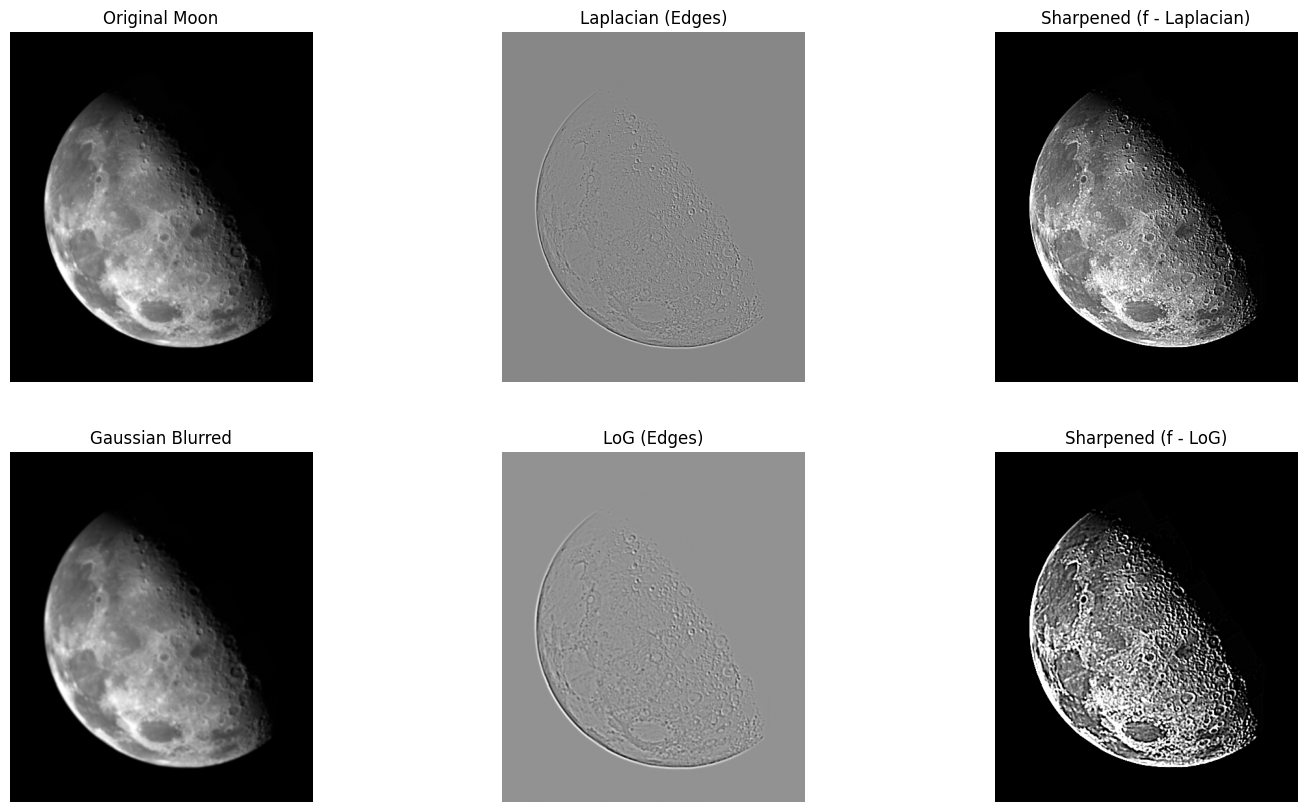

In [58]:
# Sharpening: f - Laplacian(f)
sharpened_lap = img_array - laplacian_result
sharpened_lap = np.clip(sharpened_lap, 0, 255).astype(np.uint8)

# Sharpening: f - LoG(f)
sharpened_log = img_array - log_result
sharpened_log = np.clip(sharpened_log, 0, 255).astype(np.uint8)

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.imshow(img_array, cmap="gray")
plt.title("Original Moon")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(laplacian_result, cmap="gray")
plt.title("Laplacian (Edges)")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(sharpened_lap, cmap="gray")
plt.title("Sharpened (f - Laplacian)")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(gaussian_blurred, cmap="gray")
plt.title("Gaussian Blurred")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(log_result, cmap="gray")
plt.title("LoG (Edges)")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(sharpened_log, cmap="gray")
plt.title("Sharpened (f - LoG)")
plt.axis("off")

plt.show()


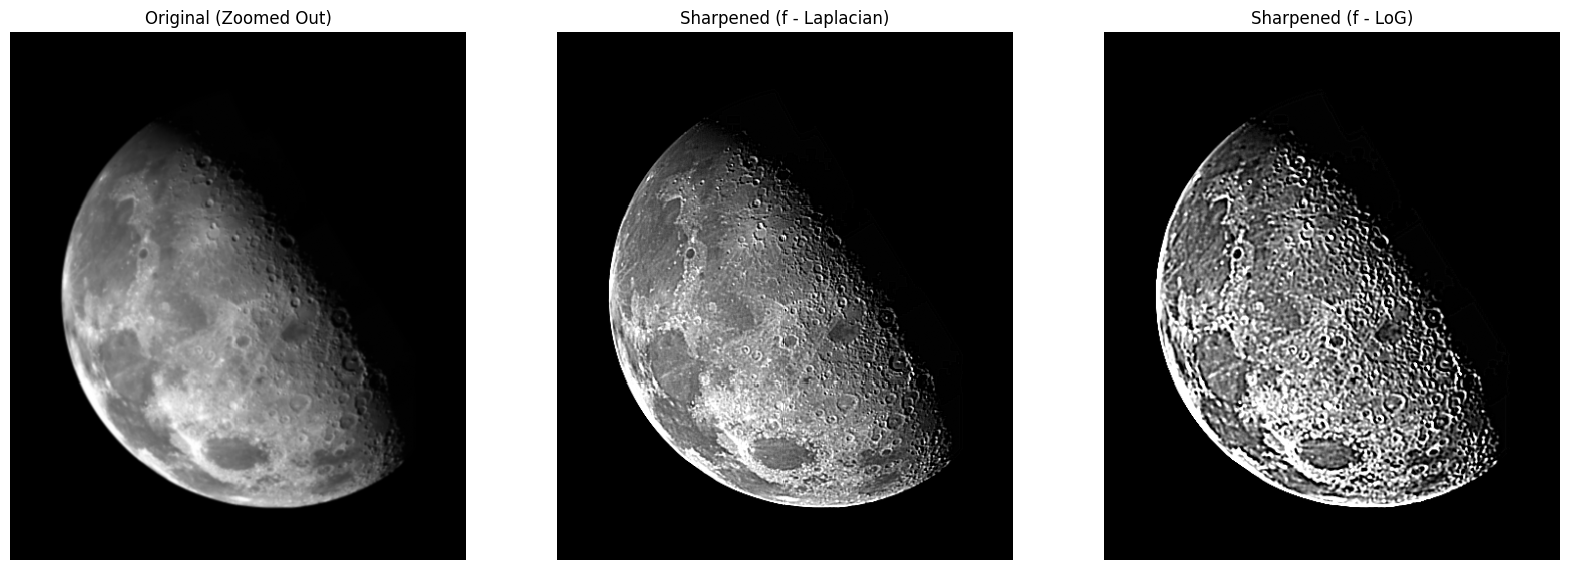

In [59]:
# perbandingan zoom out
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.imshow(img_array, cmap="gray")
plt.title("Original (Zoomed Out)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(sharpened_lap, cmap="gray")
plt.title("Sharpened (f - Laplacian)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sharpened_log, cmap="gray")
plt.title("Sharpened (f - LoG)")
plt.axis("off")

plt.show()


## Unsharp Masking dan Highboost Filtering

Mengurangkan versi _unsharp_ (_smoothed_) sebuah citra dari citra asli adalah proses yang digunakan industri percetakan untuk menajamkan citra. Proses ini disebut _unsharp masking_, yang terdiri dari proses berikut:
1. Blur citra asli.
2. Kurangkan citra blur dari citra asli, akan menghasilkan perbedaan yang disebut _mask_.
3. Tambahkan _mask_ ke citra asli.

Misal $\bar{f}(x,y)$ menyatakan citra blur, maka _mask_ diperoleh dengan persamaan
$$g_{\text{mask}}(x,y) = f(x,y) - \hat{f}(x,y)$$

Lalu ditambahkan sebuah _weighted portion_ dari _mask_ kembali ke citra asli:
$$g(x,y) = f(x,y) + k\times g_{\text{mask}}(x,y)$$

dengan $k\geq 0$. Saat $k=1$, diperoleh _unsharp masking_, seperti yang didefinisikan di atas. Namun saat $k>1$, proses ini disebut sebagai _highboost filtering_.

In [60]:
def gaussian_kernel(size=3, sigma=1, normalize=False):
    """Membuat kernel Gaussian 2D"""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma * sigma))
    if normalize:
        kernel = kernel / np.sum(kernel)
    return kernel

def gaussian_filter_normalized(img, kernel_size=3, sigma=1):
  gauss_kernel = gaussian_kernel(kernel_size, sigma, True)

  pad = kernel_size // 2
  rows, cols = img.shape
  img_padded = np.zeros((rows + 2*pad, cols + 2*pad))
  img_padded[pad:pad+rows, pad:pad+cols] = img

  filtered = np.zeros((rows, cols))

  for i in range(rows):
      for j in range(cols):
          window = img_padded[i:i+kernel_size, j:j+kernel_size]
          filtered[i, j] = np.round(np.sum(window * gauss_kernel))

  return filtered

def unsharp_masking(img, kernel_size=9, sigma=2.0, k=1.0):
    """
    img: citra input (numpy array, grayscale)
    kernel_size: ukuran kernel Gaussian
    sigma: standar deviasi Gaussian
    k: faktor pengali (k=1 untuk unsharp masking, k>1 untuk highboost)
    """
    img = img.astype(np.float32)
    blurred = gaussian_filter_normalized(img, kernel_size, sigma=sigma)
    mask = img - blurred
    sharp = img + k * mask

    sharp = np.clip(sharp, 0, 255)
    return sharp.astype(np.uint8), blurred.astype(np.uint8)

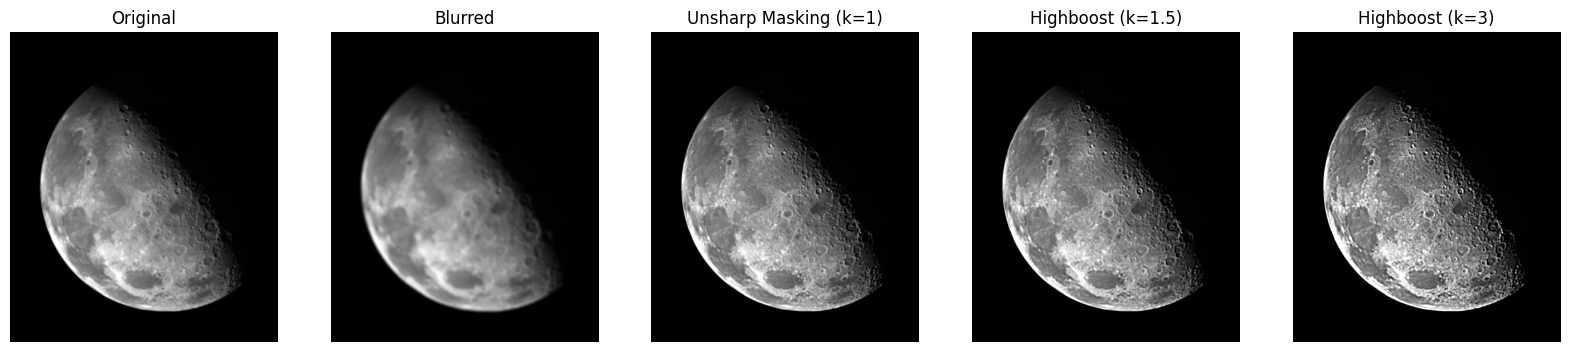

In [61]:
# Contoh menggunakan citra bulan
url = "https://drive.google.com/uc?export=download&id=19RgF4oWeJi-qH-3tY48BWeqJ1oZy3ZQI"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img_array = np.array(img)

# mencoba unsharp dengan berbagai nilai k
unsharp, blurred = unsharp_masking(img_array, kernel_size=9, sigma=2.0, k=1)
highboost15, _   = unsharp_masking(img_array, kernel_size=9, sigma=2.0, k=1.5)
highboost2, _    = unsharp_masking(img_array, kernel_size=9, sigma=2.0, k=2)
highboost3, _    = unsharp_masking(img_array, kernel_size=9, sigma=2.0, k=3)


plt.figure(figsize=(20,8))

plt.subplot(1,5,1)
plt.imshow(img_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(blurred, cmap="gray")
plt.title("Blurred")
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(unsharp, cmap="gray")
plt.title("Unsharp Masking (k=1)")
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(highboost15, cmap="gray")
plt.title("Highboost (k=1.5)")
plt.axis("off")

plt.subplot(1,5,5)
plt.imshow(highboost3, cmap="gray")
plt.title("Highboost (k=3)")
plt.axis("off")

plt.show()

## Perbandingan Laplacian, LoG, Unsharp Mask, dan High-boost

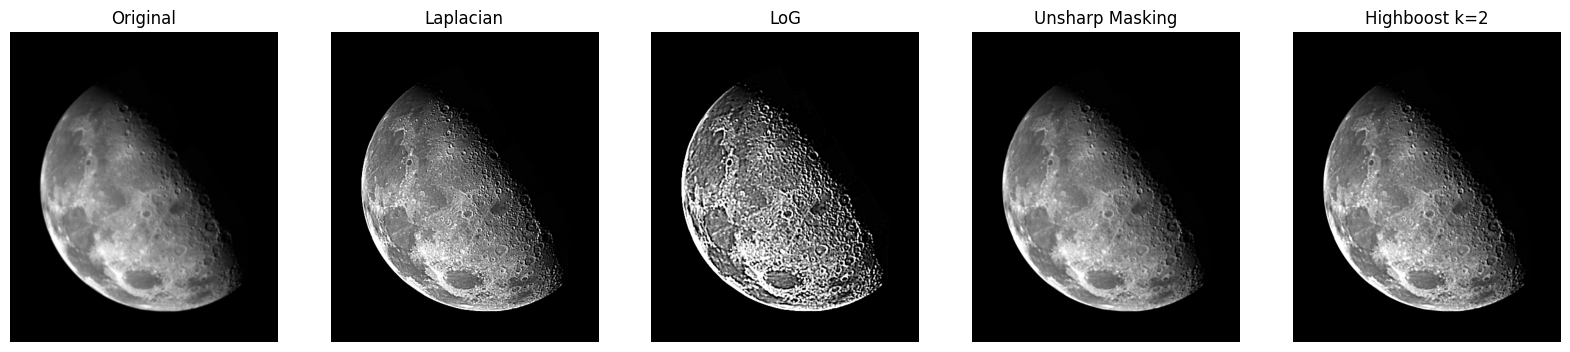

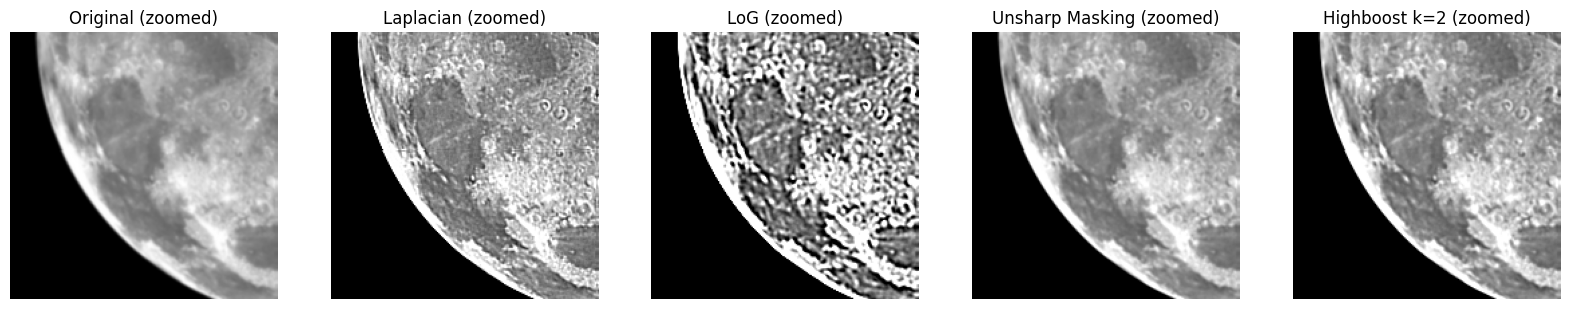

In [62]:
url = "https://drive.google.com/uc?export=download&id=19RgF4oWeJi-qH-3tY48BWeqJ1oZy3ZQI"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img_array = np.array(img, dtype=float)

laplacian8 = np.array([[1,1,1],
                       [1,-8,1],
                       [1,1,1]])

laplacian_result = convolution2d(img_array, laplacian8)

gaussian_blurred = gaussian_filter(img_array, kernel_size=5, sigma=1)
log_result = convolution2d(gaussian_blurred, laplacian8)

# Sharpening: f - Laplacian(f)
sharpened_lap = img_array - laplacian_result
sharpened_lap = np.clip(sharpened_lap, 0, 255).astype(np.uint8)

# Sharpening: f - LoG(f)
sharpened_log = img_array - log_result
sharpened_log = np.clip(sharpened_log, 0, 255).astype(np.uint8)

unsharp_result, blurred = unsharp_masking(img_array, kernel_size=9, sigma=2.0, k=1)
highboost2, _    = unsharp_masking(img_array, kernel_size=9, sigma=2.0, k=2)

rows, cols = img_array.shape
zoom_size = 200
r_start = rows//2 - zoom_size//2 + 100
c_start = cols//2 - zoom_size//2 - 100
r_end = r_start + zoom_size
c_end = c_start + zoom_size

patch_original = img_array[r_start:r_end, c_start:c_end]
patch_lap = sharpened_lap[r_start:r_end, c_start:c_end]
patch_log = sharpened_log[r_start:r_end, c_start:c_end]
patch_unsharp = unsharp_result[r_start:r_end, c_start:c_end]
patch_highboost2 = highboost2[r_start:r_end, c_start:c_end]

plt.figure(figsize=(20,12))
plt.subplot(2,5,1)
plt.imshow(img_array, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(2,5,2)
plt.imshow(sharpened_lap, cmap="gray")
plt.title("Laplacian")
plt.axis("off")

plt.subplot(2,5,3)
plt.imshow(sharpened_log, cmap="gray")
plt.title("LoG")
plt.axis("off")

plt.subplot(2,5,4)
plt.imshow(unsharp_result, cmap="gray")
plt.title("Unsharp Masking")
plt.axis("off")

plt.subplot(2,5,5)
plt.imshow(highboost2, cmap="gray")
plt.title("Highboost k=2")
plt.axis("off")

plt.figure(figsize=(20,12))
plt.subplot(2,5,6)
plt.imshow(patch_original, cmap="gray")
plt.title("Original (zoomed)")
plt.axis("off")

plt.subplot(2,5,7)
plt.imshow(patch_lap, cmap="gray")
plt.title("Laplacian (zoomed)")
plt.axis("off")

plt.subplot(2,5,8)
plt.imshow(patch_log, cmap="gray")
plt.title("LoG (zoomed)")
plt.axis("off")

plt.subplot(2,5,9)
plt.imshow(patch_unsharp, cmap="gray")
plt.title("Unsharp Masking (zoomed)")
plt.axis("off")

plt.subplot(2,5,10)
plt.imshow(patch_highboost2, cmap="gray")
plt.title("Highboost k=2 (zoomed)")
plt.axis("off")

plt.show()

# Diskusi

Dari eksperimen di atas, dapat disimpulkan bahwa
- Low-pass filter mempertahankan low frequencies dan menghapus high frequencies sehingga efektif untuk reduksi noise, namun mengorbankan detail
  - Mean filter cocok digunakan ntuk reduksi noise yang tidak terlalu parah, cukup efisien namun hasilnya kasar
  - Gaussian filter mereduksi noise namun tetap mempertahankan struktur. Namun semakin besar nilai $\sigma$, semakin blur citra yang dihasilkan
  - Median filter merupakan filter terbaik untuk _salt-and-peper noise_, serta tetap menjaga edges. Median filter bisa digunakan jika noise terlalu parah.

- High-pass filter mempertahankan high frequencies dan menghapus low frequencies. Contoh, Laplacian filter yang sudah diimplementasikan di atas kuat untuk deteksi edge, tapi masih sensitif terhadap noise.

- Sharpening with blurring operation memanfaatkan detail untuk ditambahkan kembali ke citra
  - LoG menggabungkan smoothing dan deteksi tepi. Noise yang ada pada citra berkurang akibat tahap Gaussian, dan tepi tajam tetap terdeteksi karena Laplacian menyoroti perubahan intensitas. Manfaatnya adalah deteksi tepi lebih stabil dibandikan Laplacian langsung pada citra berderau.
  - Unsharp Masking meningkatkan detail tepi secara wajar
  - Highboost Filtering memiliki proses yang sama dengan unsharp masking, hanya saja detail yang halus dan buram ditingkatkan secara lebih agresif.


Jadi, kita bisa menggunakan
- low-pass filtering untuk noise reduction;
- high-pass filtering untuk edge detection;
- unsharp masking untuk meningkatkan ketajaman citra; serta
- semua filtering dipilih sesuai jenis noise, tingkat ketajaman yang diinginkan, serta _trade-off_ antara detail versus amplifikasi noise.

# Referensi

- Gonzalez, R. C., & Woods, R. E. (2008). Digital Image Processing (3rd ed.). Upper Saddle River, NJ: Pearson Prentice Hall. ISBN: 978-0-13-168728-8.
- Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Hoboken, NJ: Pearson. ISBN: 978-0-13-335672-4.